# Laboratorium 4 - rozwiązanie
## Mnożenie macierzy i aproksymacja
**Paweł Kruczkiewicz**

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 


3. Użyć funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)**

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


## Zad 1
**Testowane funkcje**

In [3]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [5]:
#so the compilation isn't measured
A = rand(2, 2)
B = rand(2, 2)
A*B

2×2 Array{Float64,2}:
 0.108909    0.557931
 0.00910704  0.0892578

In [6]:
using DataFrames
using Statistics
using Plots


In [11]:
function add_to_tables(t1, t2, t3)
    function add_values(val1, val2, val3)
        push!(t1, val1)
        push!(t2, val2)
        push!(t3, val3)
    end
end



n_s = 100:100:500       # do szybkiego testowania danych
# n_s = 100:100:1000    # do dokładniejszego wykresu
no_of_points = Int[]
time_measurement = Float64[]
type_of_measurement = Int[]

add_values = add_to_tables(no_of_points, time_measurement, type_of_measurement)
for n in n_s
    print("n=")
    println(n)
    
    for i in 1:10
        print(i)
        print(" ")
        #matrices
        A = rand(n, n)
        B = rand(n, n)
        
       
        #naive
        time = (@timed naive_multiplication(A,B))[2]
        add_values(n, time, 1)
        
        #litle_less_naive
        time = (@timed better_multiplication(A,B))[2]
        add_values(n, time, 2)
        
        #BLAS
        time = (@timed A*B)[2]
        add_values(n, time, 3)
        
    end
    print("\n")
end

df = DataFrame(Rozmiar = no_of_points,
    Czas = time_measurement,
    Typ = type_of_measurement)
show(df)

n=100
1 2 3 4 5 6 7 8 9 10 
n=200
1 2 3 4 5 6 7 8 9 10 
n=300
1 2 3 4 5 6 7 8 9 10 
n=400
1 2 3 4 5 6 7 8 9 10 
n=500
1 2 3 4 5 6 7 8 9 10 
150×3 DataFrame
 Row │ Rozmiar  Czas         Typ   
     │ Int64    Float64      Int64 
─────┼─────────────────────────────
   1 │     100  0.0200525        1
   2 │     100  0.0016339        2
   3 │     100  0.000232101      3
   4 │     100  0.0022047        1
   5 │     100  0.0023426        2
   6 │     100  0.0006149        3
   7 │     100  0.0022415        1
   8 │     100  0.0016238        2
   9 │     100  0.000228999      3
  10 │     100  0.002182         1
  11 │     100  0.0016246        2
  ⋮  │    ⋮          ⋮         ⋮
 141 │     500  0.001949         3
 142 │     500  0.294142         1
 143 │     500  0.226078         2
 144 │     500  0.0019496        3
 145 │     500  0.29345          1
 146 │     500  0.205163         2
 147 │     500  0.0023384        3
 148 │     500  0.31491          1
 149 │     500  0.194095         2
 15

In [12]:
combined_df = combine(groupby(df, [:Typ, :Rozmiar]), :Czas => mean, :Czas => std)
grouped_dfs = [filter(row -> row[:Typ] == i, combined_df) for i in 1:3]

3-element Array{DataFrame,1}:
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean   Czas_std    
     │ Int64  Int64    Float64     Float64     
─────┼─────────────────────────────────────────
   1 │     1      100  0.00406875  0.00561872
   2 │     1      200  0.0188071   0.000746993
   3 │     1      300  0.0633467   0.00160757
   4 │     1      400  0.148817    0.000800821
   5 │     1      500  0.298871    0.0105569
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean   Czas_std    
     │ Int64  Int64    Float64     Float64     
─────┼─────────────────────────────────────────
   1 │     2      100  0.00187685  0.00027986
   2 │     2      200  0.0127714   0.000333296
   3 │     2      300  0.0421684   0.000487381
   4 │     2      400  0.0992396   0.00223392
   5 │     2      500  0.199159    0.011326
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean   Czas_std    
     │ Int64  Int64    Float64     Float64     
─────┼─────────────────────────────────────────
   1 │     3      100  0.0003151

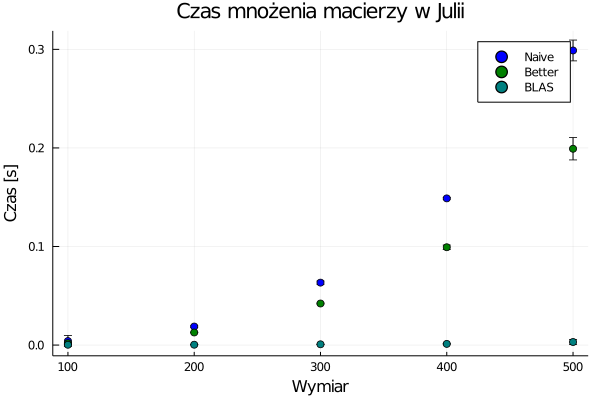

In [13]:
scatter(grouped_dfs[1].Rozmiar, grouped_dfs[1].Czas_mean, yerr=grouped_dfs[1].Czas_std, color=[:blue], label = "Naive",
        ylabel = "Czas [s]", xlabel= "Wymiar", title="Czas mnożenia macierzy w Julii")

scatter!(grouped_dfs[2].Rozmiar, grouped_dfs[2].Czas_mean, yerr=grouped_dfs[2].Czas_std, color=[:green], label = "Better")
scatter!(grouped_dfs[3].Rozmiar, grouped_dfs[3].Czas_mean, yerr=grouped_dfs[3].Czas_std, color=[:teal], label = "BLAS")

## Zad 2

```C
#include <stdio.h>
#include <stdlib.h>

#include <time.h>
#include <sys/times.h>
#include <unistd.h>

#include <gsl/gsl_blas.h>

#define NO_TESTS 5
#define NO_REPETITIONS 10
#define ARR_LEN NO_TESTS*NO_REPETITIONS*3 

void save_measurement(int *size_arr, double *time_arr, int *type_arr, int n, int start_time, int end_time, int type, int no_measurement){
    int ticks_per_sec = CLOCKS_PER_SEC;
    
    size_arr[no_measurement] = n;
    time_arr[no_measurement] = (double)(end_time - start_time) / ticks_per_sec;
    type_arr[no_measurement] = type;
}

//functions for maintaing arrays
double **zeros2d(int n){
    double **result = (double**) calloc(n, sizeof(double*));
    for (int i = 0; i < n; i++){
        result[i] = (double*) calloc(n, sizeof(double));
    }
    return result;
}

void setRandom2d(double** arr, int n){   
    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){
            arr[i][j] = 0;
        }
    }  
}

void free2d_double(double** arr, int n){
    for (int i = 0; i < n; i++){
        free(arr[i]);
    }
    free(arr);
}

void setZero2d(double** arr, int n){   
    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){
            arr[i][j] = 0;
        }
    }  
}

double* linearize_matrix(double** arr, int n){
    double* result = calloc(n*n, sizeof(double));
    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){
            result[i*n + j] = arr[i][j];
        }
    }
    return result;
}

//zakładamy, że macierz c jest wyzerowana
void naive_matrix_multiplication(double** a, double** b, double** c, int n){  
    for (int j = 0; j < n; j++){
        for (int i = 0; i < n; i++){
            for (int k = 0; k < n; k++){
                c[i][j] += a[i][k] * b[k][j]; 
            }
        }
    }
}

void better_matrix_multiplication(double** a, double** b, double** c, int n){
    for (int i = 0; i < n; i++){
        for (int k = 0; k < n; k++){
            for (int j = 0; j < n; j++){
                c[i][j] += a[i][k] * b[k][j]; 
            }
        }
    }
}

int main(void){
    srand(time(NULL));
    char path[] = "C_multiplication.csv";
    FILE* f_stream = fopen(path, "w");
    int ns[NO_TESTS] = {100, 200, 300, 400, 500};


    double **a;
    double **b;
    double **c;

    double *linear_a;
    double *linear_b;
    double *linear_c;

    gsl_matrix_view A;
    gsl_matrix_view B;
    gsl_matrix_view C;
    
    int size[ARR_LEN];
    double time[ARR_LEN];
    int type[ARR_LEN];

    int start, end;


    for (int i = 0; i < NO_TESTS; i++){
        int n = ns[i];
        a = zeros2d(n);
        b = zeros2d(n);
        c = zeros2d(n);
        
        printf("n=%d\n", n);
        for (int j = 0; j < NO_REPETITIONS; j++){
            setRandom2d(a, n);
            setRandom2d(b, n);

            start = clock();
            naive_matrix_multiplication(a, b, c, n);
            end = clock();
            save_measurement(size, time, type, n, start, end, 1, 3*(i*NO_REPETITIONS + j));

            setZero2d(c, n);

            start = clock();
            better_matrix_multiplication(a, b, c, n);
            end = clock();
            save_measurement(size, time, type, n, start, end, 2, 3*(i*NO_REPETITIONS + j) + 1);

            setZero2d(c, n);
            
            linear_a = linearize_matrix(a, n);
            linear_b = linearize_matrix(b, n);
            linear_c = linearize_matrix(c, n);

            A = gsl_matrix_view_array(linear_a, n, n);
            B = gsl_matrix_view_array(linear_b, n, n);
            C = gsl_matrix_view_array(linear_c, n, n);

            start = clock();
            gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                    1.0, &A.matrix, &B.matrix,
                    0.0, &C.matrix);
            end = clock();
            save_measurement(size, time, type, n, start, end, 3, 3*(i*NO_REPETITIONS + j) + 2);

            setZero2d(c, n);
            
             printf("iter = %d\n", j);
            free(linear_a);
            free(linear_b);
            free(linear_c);
        }

        printf("\n");
        free2d_double(a, n);
        free2d_double(b, n);
        free2d_double(c, n);
    }
    fprintf(f_stream, "Rozmiar;Czas;Typ\n");
    for (int i = 0; i < ARR_LEN; i++){
        fprintf(f_stream, "%d;%f;%d\n", size[i], time[i], type[i]);
    }
    fclose(f_stream);
}
```

In [1]:
using CSV

In [7]:
input="C_multiplication.csv"
mydata=CSV.read(input, delim=";",DataFrame)

,Rozmiar,Czas,Typ
,Int64,Float64,Int64
1,100,0.0042,1
2,100,0.003456,2
3,100,1.7e-5,3
4,100,0.005828,1
5,100,0.003534,2
6,100,1.4e-5,3
7,100,0.005029,1
8,100,0.003612,2
9,100,1.4e-5,3


In [8]:
combined_mydata = combine(groupby(mydata, [:Typ, :Rozmiar]), :Czas => mean, :Czas => std)
grouped_mydata = [filter(row -> row[:Typ] == i, combined_mydata) for i in 1:3]

3-element Array{DataFrame,1}:
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean  Czas_std    
     │ Int64  Int64    Float64    Float64     
─────┼────────────────────────────────────────
   1 │     1      100  0.0045762  0.000942806
   2 │     1      200  0.0332773  0.00338553
   3 │     1      300  0.111322   0.0060914
   4 │     1      400  0.263303   0.0048616
   5 │     1      500  0.54698    0.00286585
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean  Czas_std    
     │ Int64  Int64    Float64    Float64     
─────┼────────────────────────────────────────
   1 │     2      100  0.0037412  0.000513483
   2 │     2      200  0.0284491  0.00205398
   3 │     2      300  0.0962824  0.00980426
   4 │     2      400  0.218829   0.00655545
   5 │     2      500  0.422818   0.00258101
 5×4 DataFrame
 Row │ Typ    Rozmiar  Czas_mean  Czas_std   
     │ Int64  Int64    Float64    Float64    
─────┼───────────────────────────────────────
   1 │     3      100  1.96e-5    9.89051e-6
   2 │    

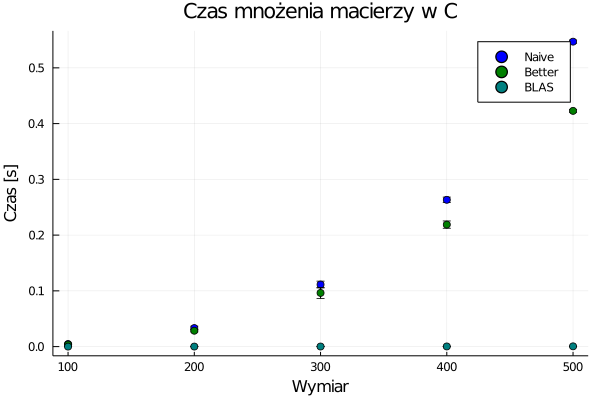

In [9]:
scatter(grouped_mydata[1].Rozmiar, grouped_mydata[1].Czas_mean, yerr=grouped_mydata[1].Czas_std, color=[:blue], label = "Naive",
        ylabel = "Czas [s]", xlabel= "Wymiar", title="Czas mnożenia macierzy w C")

scatter!(grouped_mydata[2].Rozmiar, grouped_mydata[2].Czas_mean, yerr=grouped_mydata[2].Czas_std, color=[:green], label = "Better")
scatter!(grouped_mydata[3].Rozmiar, grouped_mydata[3].Czas_mean, yerr=grouped_mydata[3].Czas_std, color=[:teal], label = "BLAS")

## Zad 3

In [32]:
using Polynomials

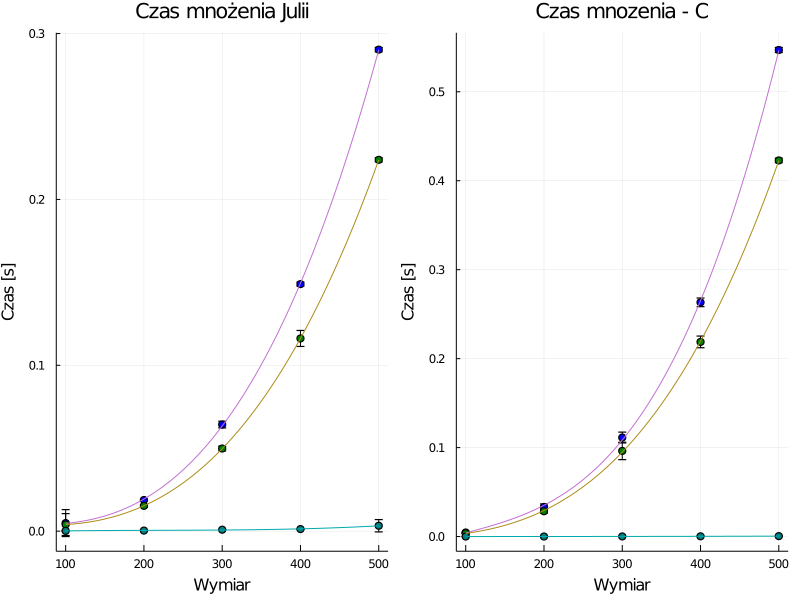

In [34]:
function give_plot(grouped_dfs, plot_title)
    xsf = 100:0.1:500
    aproximations = [Polynomials.fit(df.Rozmiar, df.Czas_mean, 3) for df in grouped_dfs]  #even BLAS is O(N^3), but it uses clever catching
    ysfs = [map(aprox, xsf) for aprox in aproximations]

    scatter(grouped_dfs[1].Rozmiar, grouped_dfs[1].Czas_mean, yerr=grouped_dfs[1].Czas_std, color=[:blue], label = "Naive",
            ylabel = "Czas [s]", xlabel= "Wymiar", title=plot_title, legend=false)
    scatter!(grouped_dfs[2].Rozmiar, grouped_dfs[2].Czas_mean, yerr=grouped_dfs[2].Czas_std, color=[:green], label = "Better")
    scatter!(grouped_dfs[3].Rozmiar, grouped_dfs[3].Czas_mean, yerr=grouped_dfs[3].Czas_std, color=[:teal], label = "BLAS")
    plot!(xsf,ysfs[1], label="Naive apr")
    plot!(xsf,ysfs[2], label="Better apr")
    plot!(xsf,ysfs[3], label="BLAS apr")
end

plot(give_plot(grouped_dfs, "Czas mnożenia Julii"), give_plot(grouped_mydata, "Czas mnozenia - C"),
    size=(800, 600))

## Zad 4

Na ile udało mi się zrobic dobry research, to interpolować za pomocą wielomianów Czebyszewa można tylko funkcje ciągłe (tzn. nie dane węzłami, lecz matematyczną funkcją). Zgadza się to również z faktem, że dla zbioru n punktów istnieje tylko jeden wielomian n tego stopnia przez nie przechodzacy.
Interpolacja wielomianami Czebyszewa ogranicza się zatem do wyboru odpowiednich punktów, dla których odczytamy wartość funkcji, i interpolowania dla punktów na tej funkcji.

Nie mam jednak na razie pojęcia, jaki jest stopień wielomianu, który chcemy znaleźć, więc postaram się napisać funkcję, która sprawdza różne stopnie wielomianu. Podejrzewam, że chodzi o porównanie wielomianu interpolującego n tego stopnia z węzłami równoodległmi oraz z węzłami Czebyszewa.

P. S. Znalazłem na wykładzie wzór na wyliczenie odpowiedniej liniowej kombinacji węzłów Czebyszewa do stopnia n, jednak zarówno metoda, nazwijmy ją, "bezpośrednia", da w efekcie ten sam wielomian, bo wybrane zostają dokładnie te same punkty.

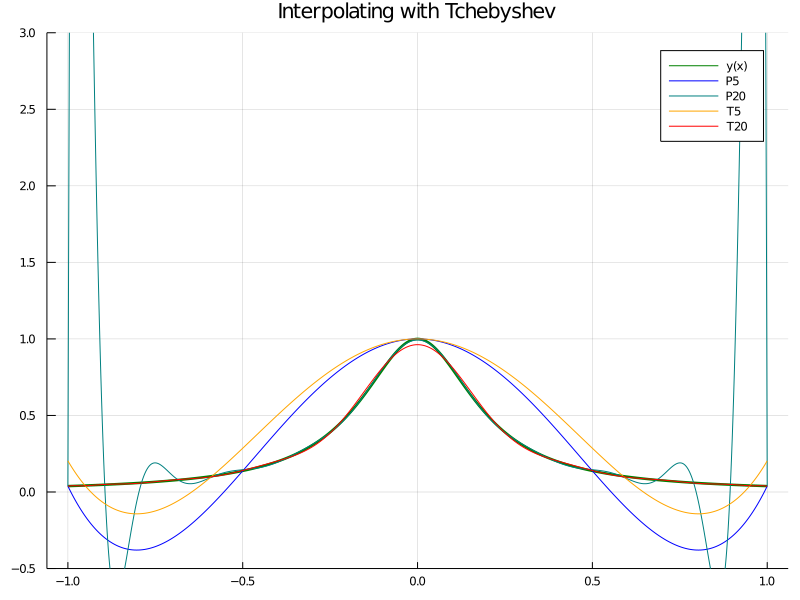

In [35]:
function equallySpacedFit(f, a, b, n)
    xs = LinRange(a, b, n)   # equally spacing n points
    ys = map(f, xs)
    fit(xs, ys)
end

function tchebyshevNodesFit(f, a, b, n)
    t_n = ChebyshevT([zeros(n); [1]])
    xs = Polynomials.roots(t_n)
    ys = map(f, xs)
    fit(xs, ys)
end


f(x) = 1/(1 + 25*x^2)  # definicja funkcji, którą będziemy interpolować (była na wykładzie)
# f(x) = 1/x
xsf = LinRange(-1, 1, 1000)   # wybieramy przedział [-1, 1], żeby się nie męczyć
ysf = map(f, xsf)

plot(xsf, ysf, label="y(x)",
    ylims=(-0.5, 3),
    gridopacity=0.2,
    title="Interpolating with Tchebyshev", color=:green, linewidth=2.5, size=(800, 600))

p5 = equallySpacedFit(f, -1, 1, 5)
p20 = equallySpacedFit(f, -1, 1, 20)
plot!(xsf, map(p5, xsf), label = "P5", color=:blue)
plot!(xsf, map(p20, xsf), label = "P20", color=:teal)

t_inter5 = tchebyshevNodesFit(f, -1, 1, 5)
t_inter20 = tchebyshevNodesFit(f, -1, 1, 20)
plot!(xsf, map(t_inter5, xsf), label = "T5", color=:orange)
plot!(xsf, map(t_inter20, xsf), label = "T20",  color=:red)

## Zad 5

In [2]:
using TaylorSeries
using Plots
using Polynomials


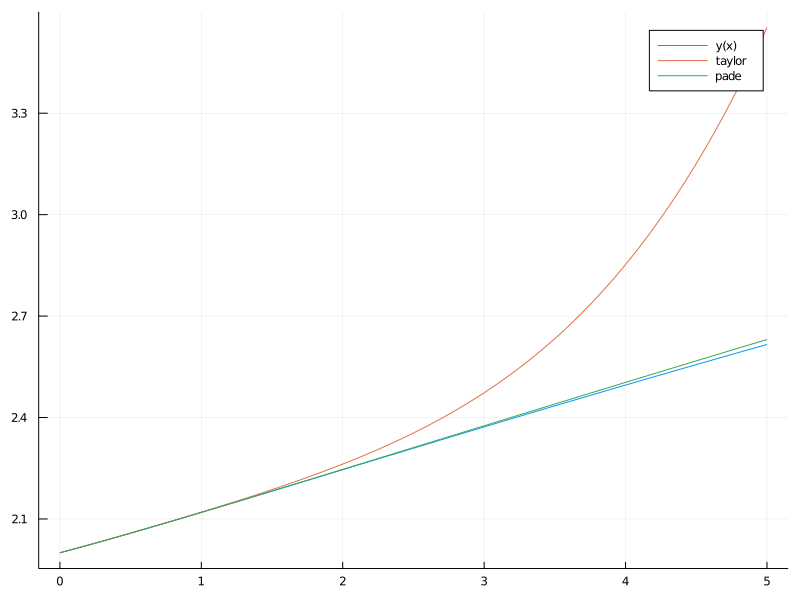

In [3]:
f(x) = (7+(1+x)^(4/3))^(1/3)
xsf = LinRange(0, 5, 1000)

t = Taylor1(Float64, 4)
f_taylor = f(t)
f_t_pol = Polynomial(f_taylor.coeffs)

f_pade = Polynomials.PolyCompat.PadeApproximation.Pade(f_t_pol, 2, 2)

plot(xsf, map(f, xsf), label="y(x)", size=(800, 600))
plot!(xsf, map(f_t_pol, xsf), label="taylor")
plot!(xsf, map(f_pade, xsf), label="pade")